In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

We have imported the neccessary libraries 

Loading the dataset of GRE scores into the dataframe

In [7]:
df=pd.read_csv('dataset\Admission_Predict_Ver1.1.csv')

About the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df = df.drop(columns=['Serial No.'])

In [11]:
df.shape

(500, 8)

In [12]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Checked for any null values. Observation is that there were no null values in the dataset

In [13]:
df.duplicated().sum()

0

Checked for any duplicate values and there were none

Checking for the unique values 

In [14]:
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

Checking the statistics of the data

In [15]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


From the statistics that we have got we can say that:
The applicant pool has and average GRE score of 316.472 and average TOFEL score of 107.192.The pool has an average unversity rating of 3.11 showcasing the dataset is diverse interms of university rating.Academic performance is highlighted by an average CGPA of 8.58, while research experience is noted in approximately 56% of applicants. Admission chances average 72%, indicating variability in application competitiveness based on academic and non-academic factors.

Exploring the Data

In [16]:
print("Unqiue values in GRE score are:")
print(df['GRE Score'].unique())

Unqiue values in GRE score are:
[337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293]


In [17]:
print("Unqiue values in TOEFL score are:")
print(df['TOEFL Score'].unique())

Unqiue values in TOEFL score are:
[118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92]


In [18]:
print("Unqiue values in university Rating are:")
print(df['University Rating'].unique())

Unqiue values in university Rating are:
[4 3 2 5 1]


In [19]:
print("Unqiue values in SOP are:")
print(df['SOP'].unique())

Unqiue values in SOP are:
[4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]


In [20]:
print("Unqiue values in CGPA are:")
print(df['CGPA'].unique())

Unqiue values in CGPA are:
[9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.26 9.43
 9.06 8.75 8.89 8.69 7.86 9.01 8.97 8.33 8.27 7.98 8.04 9.07 9.13 9.23
 8.32 8.98 8.94 9.53 8.52 8.43 8.54 9.91 9.87 7.65 7.89 9.14 9.66 9.78
 9.42 9.26 8.79 8.23 8.53 8.07 9.31 9.17 9.19 8.37 7.68 8.15 8.73 8.83
 8.57 9.68 8.09 8.17 7.64 8.01 7.95 8.49 7.87 7.97 8.18 8.55 8.74 8.13
 8.44 9.47 8.24 7.34 7.43 7.25 8.06 7.67 9.54 9.62 7.56 9.74 9.82 7.96
 7.45 7.94 8.35 7.42 8.95 9.86 7.23 7.79 9.25 9.67 8.86 7.57 7.21 9.27
 7.81 7.69]


In [21]:
print("Unqiue values in LOR are:")
print(df['LOR '].unique())

Unqiue values in LOR are:
[4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]


In [22]:
print(df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [23]:
print("Unqiue values in Research are:")
print(df['Research'].unique())

Unqiue values in Research are:
[1 0]


In [24]:
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'object']
print('Number of Numerical Features is {} and they are {}'.format(len(numerical_features),numerical_features))



Number of Numerical Features is 8 and they are ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [25]:
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'object']
print('Number of Categorical Features is {} and they are {}'.format(len(categorical_features),categorical_features))

Number of Categorical Features is 0 and they are []


Visualizing the Dataset

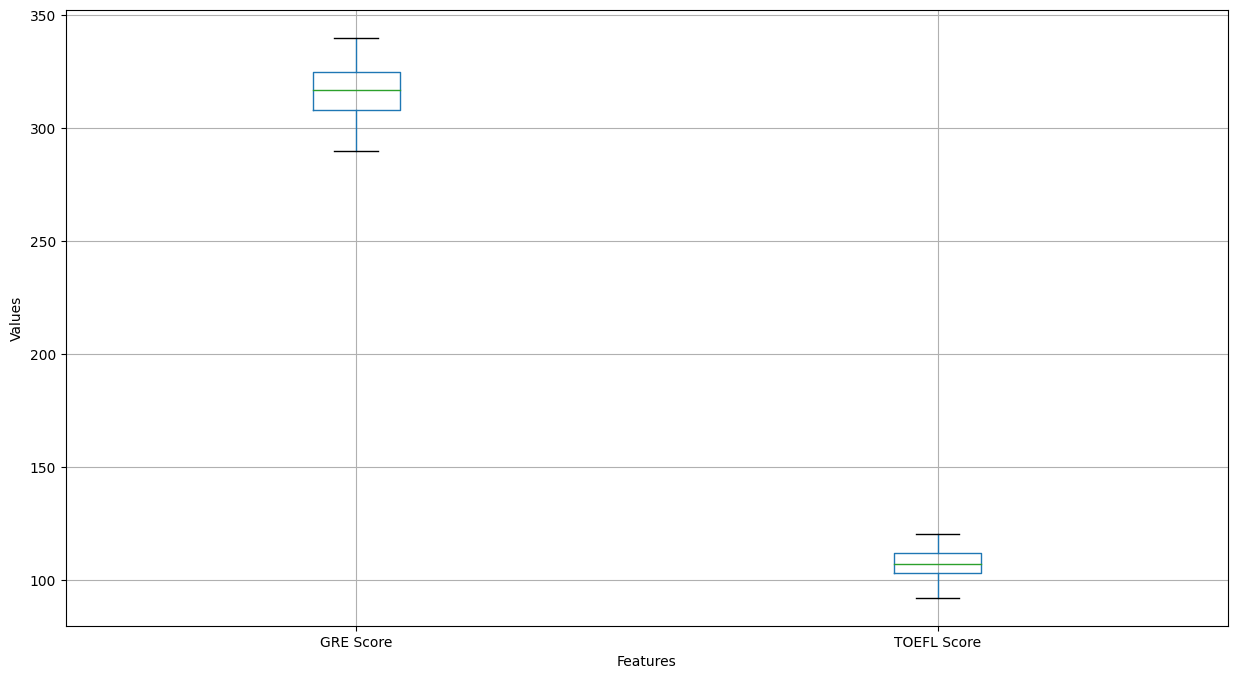

In [26]:
plt.figure(figsize=(15, 8))
df.boxplot(column=['GRE Score', 'TOEFL Score'])
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

It can be concluded that there are no outliers in the data of GRE and TOEFL scores

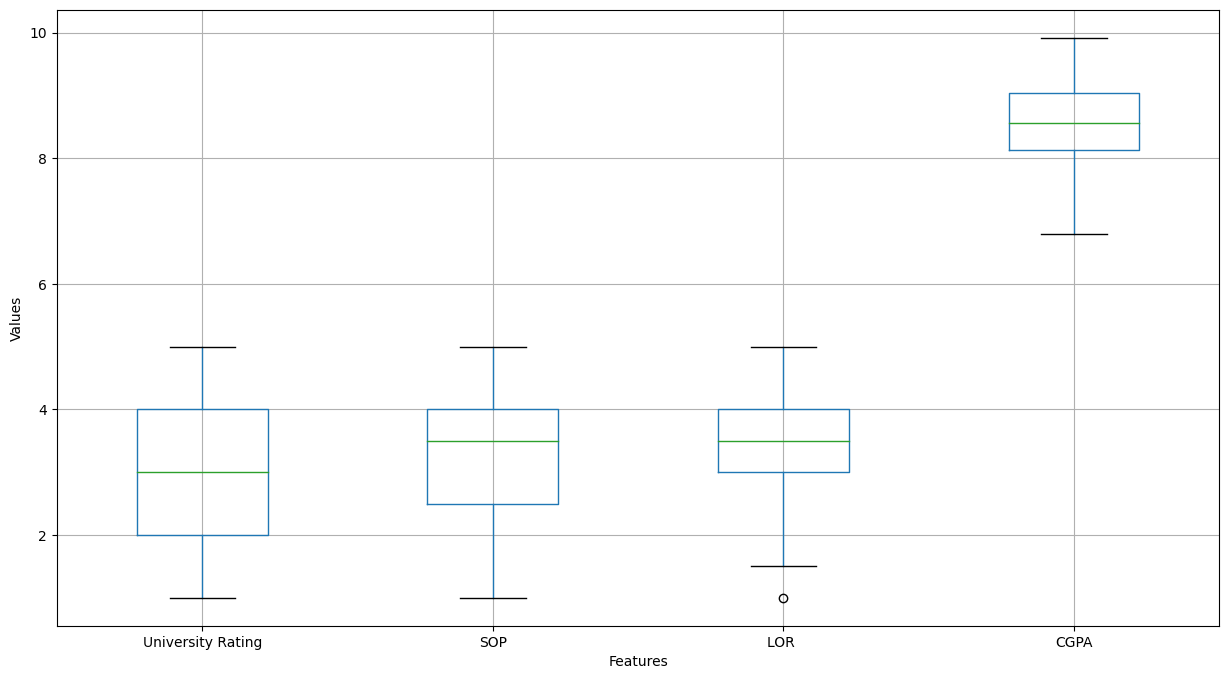

In [27]:
plt.figure(figsize=(15, 8))
df.boxplot(column=['University Rating', 'SOP', 'LOR ', 'CGPA'])
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

Here, we have a outlier in LOR

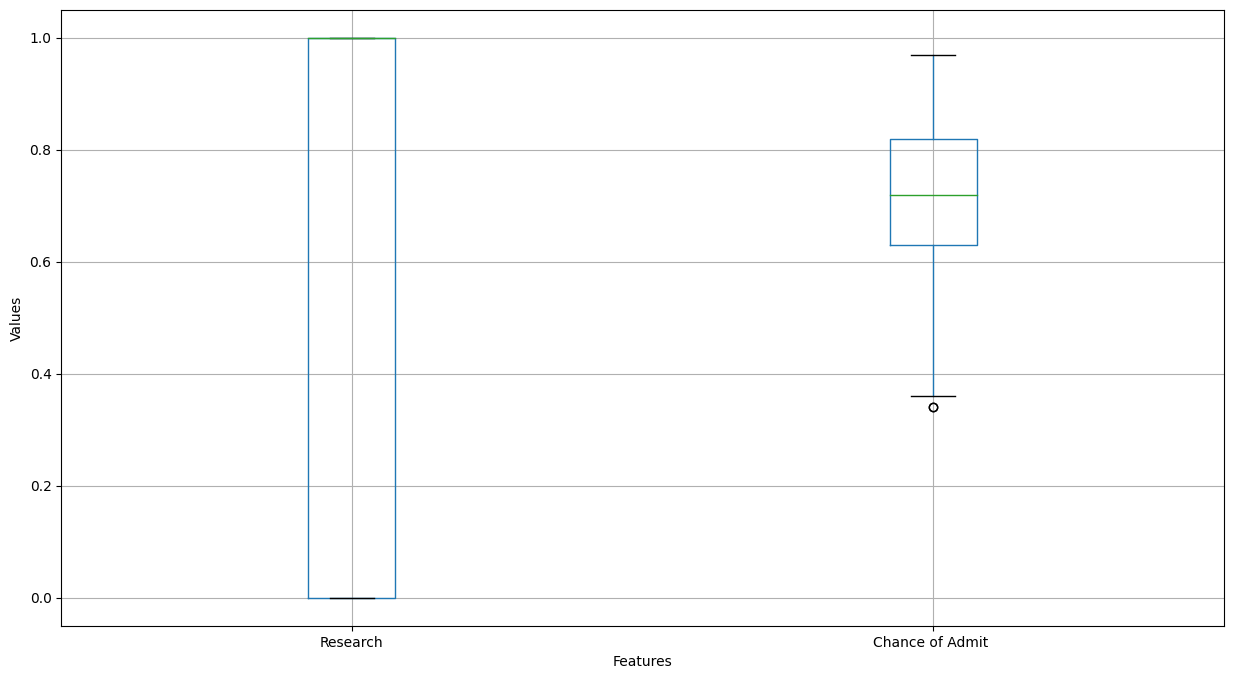

In [28]:
plt.figure(figsize=(15, 8))
df.boxplot(column=['Research', 'Chance of Admit '])
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

There is an outlier in the Chance of admit feature

In [29]:
df1=df.copy()
Q1=df1.quantile(0.25)
Q3=df1.quantile(0.75)
IQR=Q3-Q1
print("Inter-quratile range : ")
print(IQR)

Inter-quratile range : 
GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [30]:
df_outlier1=df1[((df1<(Q1-1.5*IQR))|(df1>(Q3+1.5*IQR))).any(axis=1)]
df_outlier1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


The Dataset has 3 outliers in total

In [31]:
df_outliers=df1[~((df1 <(Q1 - 1.5*IQR))|(df1>(Q3 + 1.5*IQR))).any(axis=1)]
df2=df_outliers.copy()
print(df2.shape)
df2.head()

(497, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Univariate Analysis

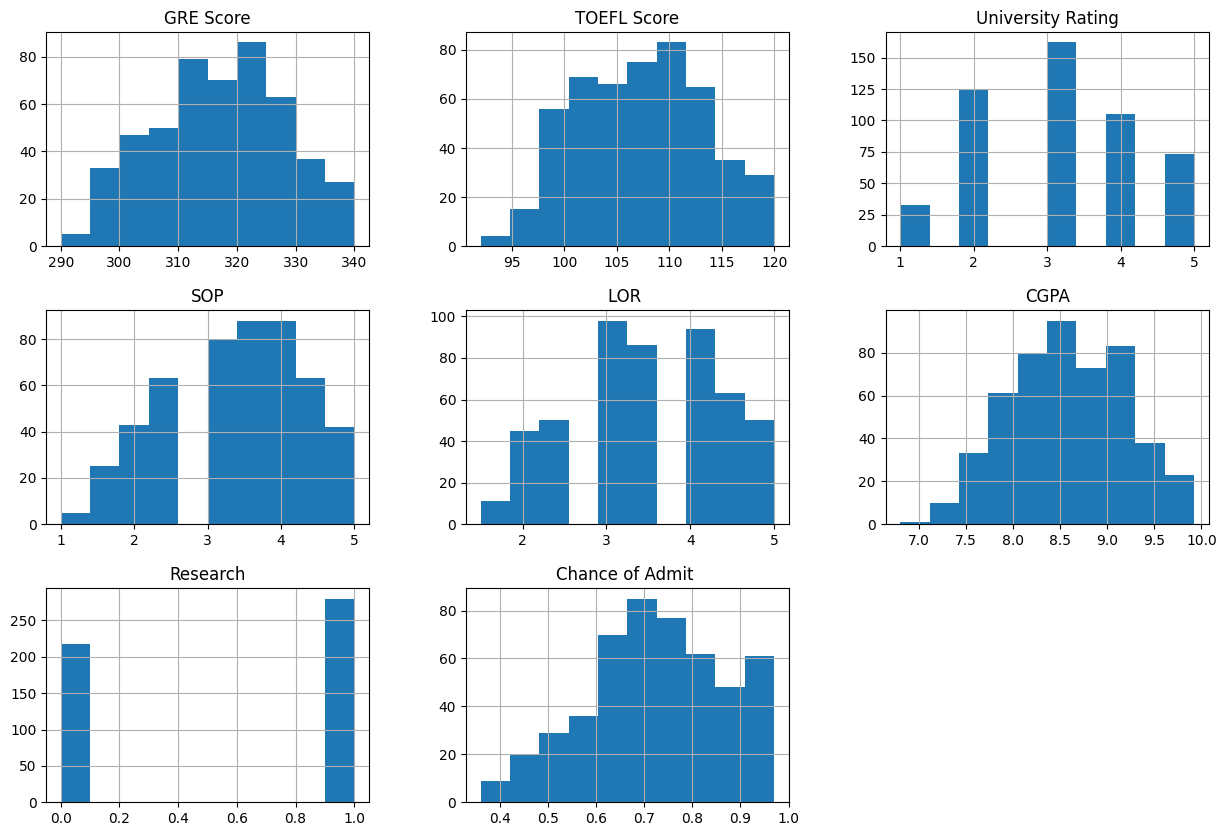

In [32]:
df2.hist(figsize=(15, 10))
plt.show()

GRE Score:

Most applicants have GRE scores between 300 and 330, with a peak around 320.
Very few applicants have scores below 300 or above 330.
TOEFL Score:

TOEFL scores for most applicants range from 95 to 120, with a peak around 110.
Few applicants have scores below 95 or above 115.
University Rating:

The majority of applicants come from universities rated 2, 3, or 4.
Fewer applicants come from universities rated 1 or 5.
SOP (Statement of Purpose):

SOP ratings are mostly between 2 and 5, with a peak at 4.
Very few applicants have an SOP rating of 1.
LOR (Letter of Recommendation):

LOR ratings range from 2 to 5, with peaks at 3 and 4.
Very few applicants have LOR ratings below 2.
CGPA:

Most applicants have a CGPA between 7.0 and 10.0, with a peak around 8.5.
Few applicants have a CGPA below 7.0 or above 9.5.
Research:

There is a binary distribution with applicants either having research experience (1) or not (0).
A higher number of applicants have research experience.
Chance of Admit:

The chance of admit ranges from 0.4 to 1.0, with a peak around 0.7 to 0.8.
Very few applicants have a chance of admit below 0.5.
Overall, most applicants have strong profiles with high GRE and TOEFL scores, good university ratings, strong SOPs and LORs, high CGPAs, and significant research experience. This suggests a competitive applicant pool for graduate admissions.

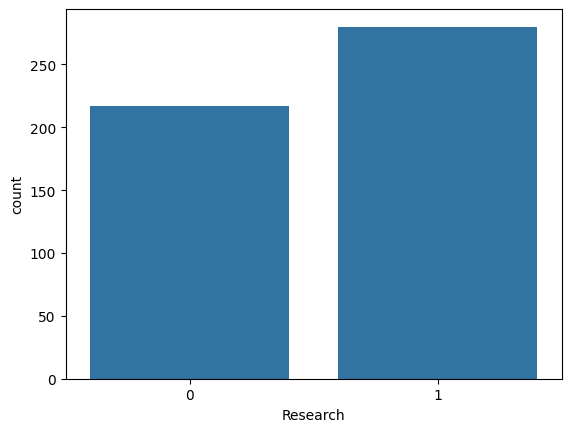

Research
1    280
0    217
Name: count, dtype: int64

In [33]:
sns.countplot(x='Research', data=df2)
plt.show()
df2['Research'].value_counts()

There are 280 students with experience.

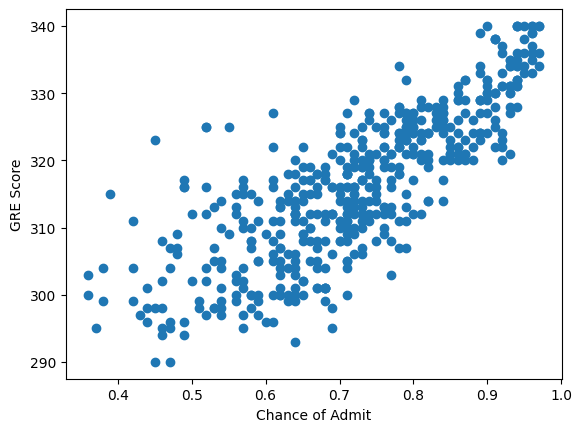

In [34]:
plt.scatter(df2['Chance of Admit '], df2['GRE Score'])
plt.xlabel('Chance of Admit')
plt.ylabel('GRE Score')
plt.show()

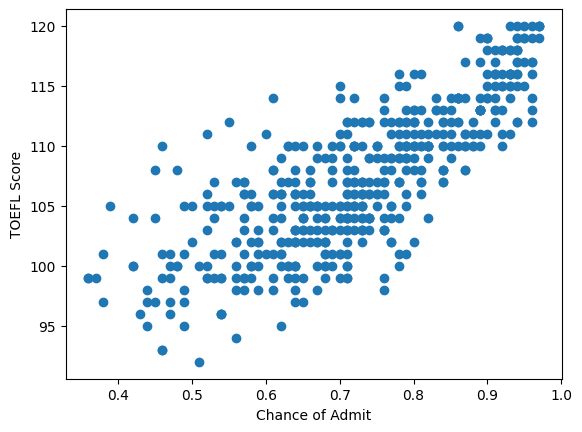

In [35]:
plt.scatter(df2['Chance of Admit '], df2['TOEFL Score'])
plt.xlabel('Chance of Admit')
plt.ylabel('TOEFL Score')
plt.show()

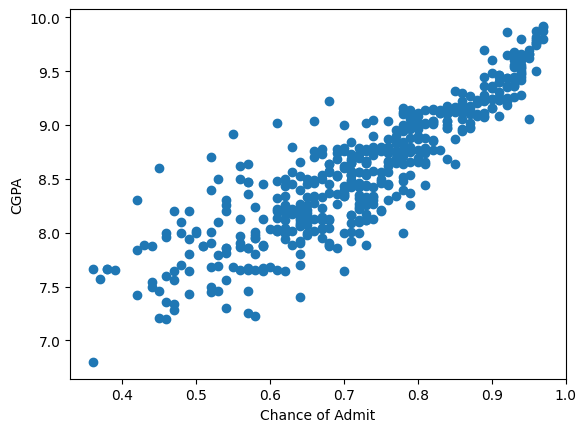

In [36]:
plt.scatter(df2['Chance of Admit '], df2['CGPA'])
plt.xlabel('Chance of Admit')
plt.ylabel('CGPA')
plt.show()

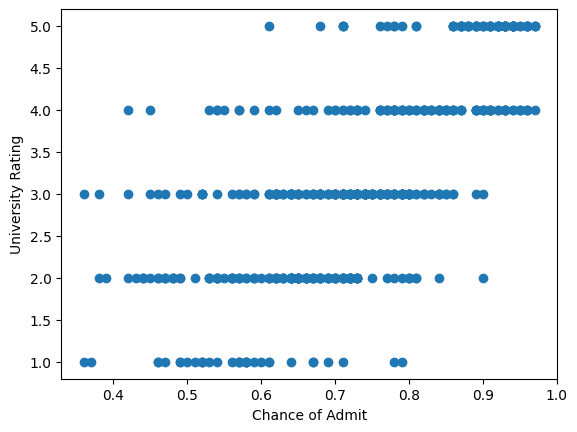

In [37]:
plt.scatter(df2['Chance of Admit '], df2['University Rating'])
plt.xlabel('Chance of Admit')
plt.ylabel('University Rating')
plt.show()

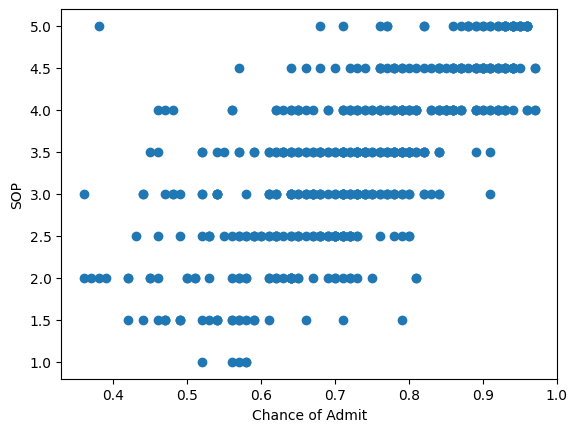

In [38]:
plt.scatter(df2['Chance of Admit '], df2['SOP'])
plt.xlabel('Chance of Admit')
plt.ylabel('SOP')
plt.show()

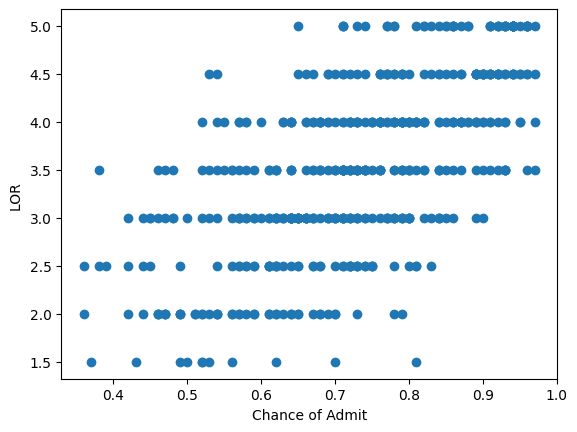

In [39]:
plt.scatter(df2['Chance of Admit '], df2['LOR '])
plt.xlabel('Chance of Admit')
plt.ylabel('LOR ')
plt.show()

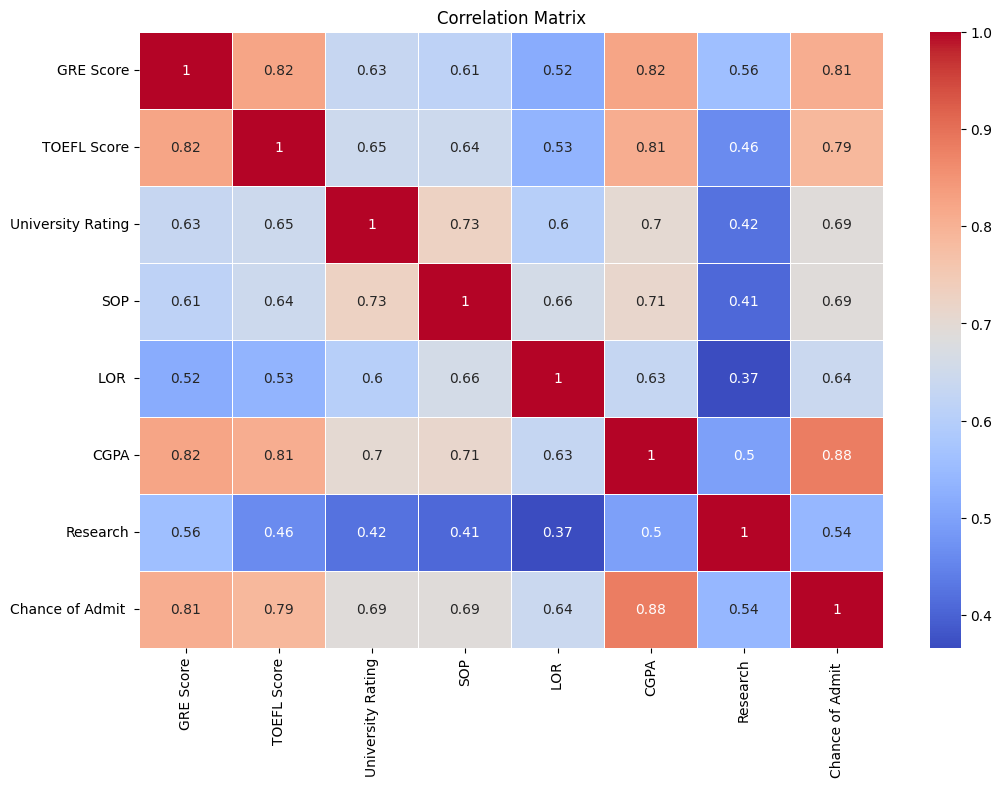

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

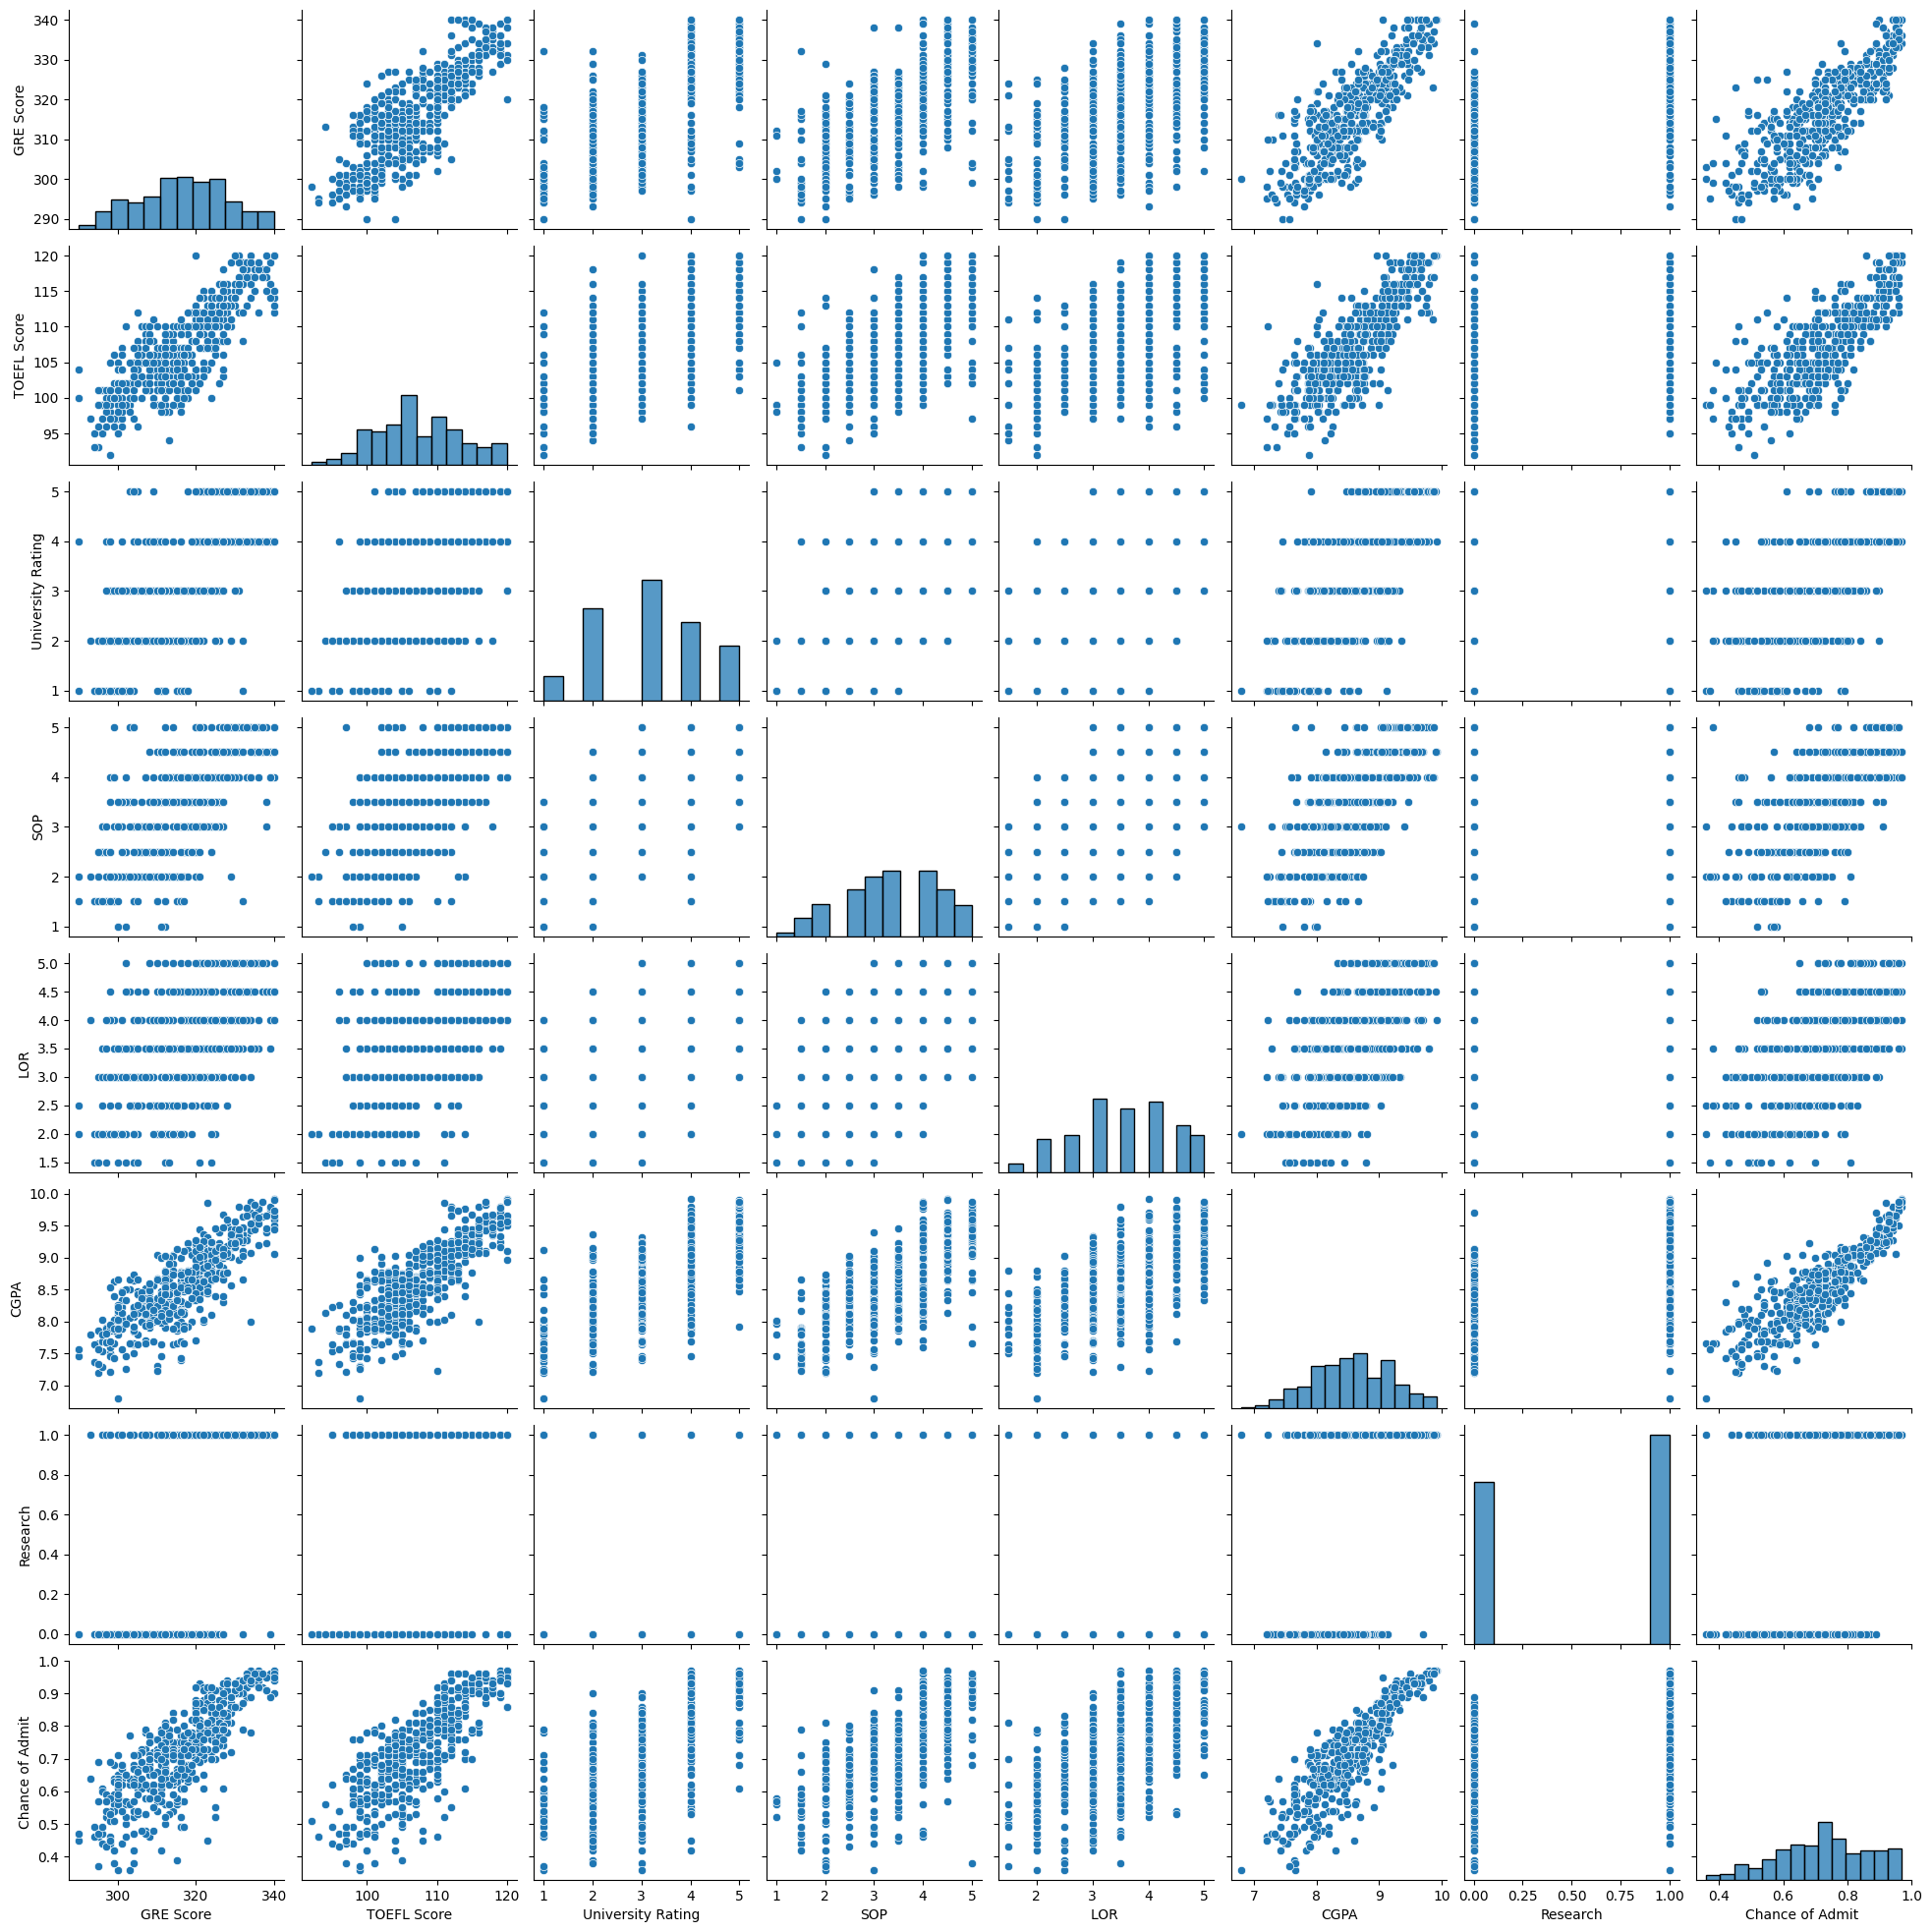

In [41]:
sns.pairplot(df2[numerical_features])
plt.show()

In [42]:
df2.to_csv('my_dataframe.csv')